In [1]:
# Import necessary libraries
import os
import joblib
import cv2
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import skimage.io
from tqdm import tqdm
import tensorflow as tf
from PIL import Image
#import pytesseract
import argparse
import os
import pandas as pd
from sklearn import preprocessing
import math
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import pickle
from random import shuffle
from keras.optimizers import Adam
import tensorflow as tf
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
from statistics import mode
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score

In [2]:
classes=[]
for folders in os.listdir('E:/BGB_example_files_test_last/images'): 
  classes.append(folders)
for class_ in classes:
      print(class_,len(os.listdir('E:/BGB_example_files_test_last/images'+'/'+class_)))


Collection_Note 249
Credit_Report 135
Customer_Remittance_Advice 38
Delivery_Note 239
Delivery_Sheets 91
Disposal_Request 26
Docusign_Completions 34
Email 134
Email_Invoices 19
External_Invoices 136
Internal_Invoices 573
Labels 19
Lease_Return 79
Machine_Checklist 15
OCB 793
Onbase_Screen_Shot 12
Payment_Emails 12
Payment_Request 14
Purchase_Order 31
Refunds 202
Rental_Agreements 72
Resite_Order 44
Sales_Quotation_Report_PPD 200
Site_Survey 80
WMS_Form 20
WM_Sheet 22
Worksheets 16


In [25]:
def convert (path):
    classes1=[]
    num_docs1=[]
    for folders in os.listdir("E:\BGB_example_files_test_last\images"):
        classes1.append(folders)
    for class_ in classes:
        num_docs1.append(len(os.listdir("E:\BGB_example_files_test_last\images" + "/" + class_)))
    #df1 = pd.DataFrame({"class":classes, "number of docs":num_docs})
    
    classes2=[]
    num_docs2=[]
    for folders in os.listdir("E:\BGB_example_files_test_last\BGB\sample\images"):
        classes2.append(folders)
    for class_ in classes:
        num_docs2.append(len(os.listdir("E:\BGB_example_files_test_last\BGB\sample\images" + "/" + class_)))
    df1 = pd.DataFrame({"class":classes1, "number of docs":num_docs1, "number of pages":num_docs2})

    
    
    return df1
        

    
    
    

In [29]:
def convert (path,path2):
    classes1=[]
    num_docs1=[]
    for folders in os.listdir(path):
        classes1.append(folders)
    for class_ in classes:
        num_docs1.append(len(os.listdir(path + "/" + class_)))
    #df1 = pd.DataFrame({"class":classes, "number of docs":num_docs})
    
    classes2=[]
    num_docs2=[]
    for folders in os.listdir(path2):
        classes2.append(folders)
    for class_ in classes:
        num_docs2.append(len(os.listdir(path2 + "/" + class_)))
    df1 = pd.DataFrame({"class":classes1, "number of docs":num_docs1, "number of pages":num_docs2})  
    
    return df1
        

    
    
    

In [30]:
convert("E:\BGB_example_files_test_last\images", "E:\BGB_example_files_test_last\BGB\BGB_example_files\images")

,class,number of docs,number of pages
0,Collection_Note,249,964
1,Credit_Report,135,516
2,Customer_Remittance_Advice,38,175
3,Delivery_Note,239,951
4,Delivery_Sheets,91,369
5,Disposal_Request,26,111
6,Docusign_Completions,34,152
7,Email,134,548
8,Email_Invoices,19,97
9,External_Invoices,136,588


In [77]:
convert('E:/BGB_example_files_test_last/images', "E:\BGB_example_files_test_last\BGB\BGB_intra\images")

,class,number of docs
0,Collection_Note,249
1,Credit_Report,135
2,Customer_Remittance_Advice,38
3,Delivery_Note,239
4,Delivery_Sheets,91
5,Disposal_Request,26
6,Docusign_Completions,34
7,Email,134
8,Email_Invoices,19
9,External_Invoices,136


In [59]:
df

NameError: name 'df' is not defined

In [114]:
class_dic ={"Collection_Note": 249,
"Credit_Report": 135,
"Customer_Remittance_Advice": 38,
"Delivery_Note": 239,
"Delivery_Sheets": 91,
"Disposal_Request": 26,
"Docusign_Completions": 34,
"Email": 134,
"Email_Invoices": 19,
"External_Invoices": 136,
"Internal_Invoices": 573,
"Labels": 19,
"Lease_Return": 79,
"Machine_Checklist": 15,
"OCB": 793,
"Onbase_Screen_Shot": 12,
"Payment_Emails": 12,
"Payment_Request": 14,
"Purchase_Order": 31,
"Refunds": 202,
"Rental_Agreements": 72,
"Resite_Order": 44,
"Sales_Quotation_Report_PPD": 200,
"Site_Survey": 80,
"WMS_Form": 20,
"WM_Sheet":22,
"Worksheets": 16
}

In [63]:
df= pd.DataFrame({'Category':["Collection_Note",
"Credit_Report",
"Customer_Remittance_Advice",
"Delivery_Note",
"Delivery_Sheets",
"Disposal_Request",
"Docusign_Completions",
"Email",
"Email_Invoices",
"External_Invoices",
"Internal_Invoices",
"Labels",
"Lease_Return",
"Machine_Checklist",
"OCB",
"Onbase_Screen_Shot",
"Payment_Emails",
"Payment_Request",
"Purchase_Order",
"Refunds",
"Rental_Agreements",
"Resite_Order",
"Sales_Quotation_Report_PPD",
"Site_Survey",
"WMS_Form",
"WM_Sheet",
"Worksheets"
],'Number of Pages':[249,135,38,239,91,26,34,134,19,136,573,19,79,15,793,12,12,14,31,202,72,44,200,80,20,22,16]})


In [75]:
num = x["Number of Pages"].tolist()

In [117]:
def percent(row, tot):

    #row = df["Number of Pages"]
    #tot = sum(df["Number of Pages"])
    return round(row/tot*100, 2)

In [124]:
df["percentages"] = percent(df["Number of Pages"],sum(df["Number of Pages"]))
#df["percentages"] = df["percentages"].astype(str) + '%'

#df["counts"] = percent(df["Number of Pages"],(df["Number of Pages"].count()))

In [126]:
df.at['Total', 'Number of Pages'] = df['Number of Pages'].sum()
#df["Number of Pages"]= df["Number of Pages"].sum()

In [127]:
#df.loc['Tot'] = df['Number of Pages'].sum()
df.at['Total', 'percentages'] = df['percentages'].sum()


In [128]:
df

,Category,Number of Pages,percentages
0,Collection_Note,249.0,3.77
1,Credit_Report,135.0,2.04
2,Customer_Remittance_Advice,38.0,0.57
3,Delivery_Note,239.0,3.62
4,Delivery_Sheets,91.0,1.38
5,Disposal_Request,26.0,0.39
6,Docusign_Completions,34.0,0.51
7,Email,134.0,2.03
8,Email_Invoices,19.0,0.29
9,External_Invoices,136.0,2.06


In [98]:
classes

['Collection_Note',
 'Credit_Report',
 'Customer_Remittance_Advice',
 'Delivery_Note',
 'Delivery_Sheets',
 'Disposal_Request',
 'Docusign_Completions',
 'Email',
 'Email_Invoices',
 'External_Invoices',
 'Internal_Invoices',
 'Labels',
 'Lease_Return',
 'Machine_Checklist',
 'OCB',
 'Onbase_Screen_Shot',
 'Payment_Emails',
 'Payment_Request',
 'Purchase_Order',
 'Refunds',
 'Rental_Agreements',
 'Resite_Order',
 'Sales_Quotation_Report_PPD',
 'Site_Survey',
 'WMS_Form',
 'WM_Sheet',
 'Worksheets']

In [17]:
train_dir='E:/BGB_example_files_test_last/images'         #'E:/BGB_example_files_test2/images'

os.mkdir('E:/BGB_example_files_test_last/train') # os.mkdir('E:/BGB_example_files_test2/train')
os.mkdir('E:/BGB_example_files_test_last/test')  # os.mkdir('E:/BGB_example_files_test2/test')
os.mkdir('E:/BGB_example_files_test_last/val')   # os.mkdir('E:/BGB_example_files_test2/val')

In [18]:
regions = ['header', 'footer', 'left_body', 'right_body']
labels={}
for i in range(len(sorted(classes))):
  labels[sorted(classes)[i]]=i
classes_rev=dict([(v,k) for (k,v) in labels.items()])

In [19]:
classes_rev

{0: 'Collection_Note',
 1: 'Credit_Report',
 2: 'Customer_Remittance_Advice',
 3: 'Delivery_Note',
 4: 'Delivery_Sheets',
 5: 'Disposal_Request',
 6: 'Docusign_Completions',
 7: 'Email',
 8: 'Email_Invoices',
 9: 'External_Invoices',
 10: 'Internal_Invoices',
 11: 'Labels',
 12: 'Lease_Return',
 13: 'Machine_Checklist',
 14: 'OCB',
 15: 'Onbase_Screen_Shot',
 16: 'Payment_Emails',
 17: 'Payment_Request',
 18: 'Purchase_Order',
 19: 'Refunds',
 20: 'Rental_Agreements',
 21: 'Resite_Order',
 22: 'Sales_Quotation_Report_PPD',
 23: 'Site_Survey',
 24: 'WMS_Form',
 25: 'WM_Sheet',
 26: 'Worksheets'}

In [20]:
# Test directory for wholistic model
test_dir='E:/BGB_example_files_test_last/test/whole'  # test_dir='E:/BGB_example_files_test2/test/whole'
val_dir='E:/BGB_example_files_test_last/val/whole'    # val_dir='E:/BGB_example_files_test2/val/whole'
#os.mkdir('test')
if(os.path.exists(test_dir)== False):
  os.mkdir(test_dir)
if(os.path.exists(val_dir)== False):
  os.mkdir(val_dir)  
for folder in classes:
  if(os.path.exists('test/whole'+folder)== False):
      os.mkdir('test/whole/'+folder)  
  if(os.path.exists('val/whole'+folder)== False):
      os.mkdir('val/whole/'+folder)  

In [21]:
# Moving files from source to test and  directory
source_dir='E:/BGB_example_files_test_last/images' # source_dir='E:/BGB_example_files_test2/images'
dest_dir='E:/BGB_example_files_test_last/test/whole'     # des_dir = 'E:/BGB_example_files_test2/val/whole'
# Configure test and val data percentage here
# we are going with train 0.8, test 0.1, val 0.1
test_percentage=0.1
val_percentage=0.1


for folder in os.listdir(source_dir):
  files=os.listdir(source_dir+'/'+folder)
  count=0
  num_image_per_class=math.ceil(len(files)*test_percentage)
  shuffle(files)
  for file in files:
    if(count!=num_image_per_class):
        source=source_dir+'/'+folder+'/'+file
        dest=dest_dir+'/'+folder+'/'+file
        if(os.path.exists(dest)==False):
            shutil.move(source,dest)
            count+=1
            
dest_dir='E:/BGB_example_files_test_last/val/whole'   # des_dir = 'E:/BGB_example_files_test2/val/whole'
for folder in os.listdir(source_dir):
  files=os.listdir(source_dir+'/'+folder)
  count=0
  num_image_per_class=math.ceil(len(files)*val_percentage)
  shuffle(files)
  for file in files:
    if(count!=num_image_per_class):
        source=source_dir+'/'+folder+'/'+file
        dest=dest_dir+'/'+folder+'/'+file
        if(os.path.exists(dest)==False):
            shutil.move(source,dest)
            count+=1

In [22]:
# Create folder structure for regional data
for region in regions:
    if(os.path.exists('train/'+region)==False):
        os.mkdir('train/'+region)
    if(os.path.exists('test/'+region)==False):
        os.mkdir('test/'+region)
    if(os.path.exists('val/'+region)==False):
        os.mkdir('val/'+region)    

for region in regions:
    for folder in classes:
        if(os.path.exists('test/'+region+'/'+folder)== False):
            os.mkdir('test/'+region+'/'+folder) 
        if(os.path.exists('train/'+region+'/'+folder)== False):
            os.mkdir('train/'+region+'/'+folder)
        if(os.path.exists('val/'+region+'/'+folder)== False):
            os.mkdir('val/'+region+'/'+folder)  

In [ ]:
classes=[]
for folders in os.listdir('E:/BGB_example_files_test_last/images'): 
  classes.append(folders)

train_dir='E:/BGB_example_files_test_last/images'         #'E:/BGB_example_files_test2/images'

os.mkdir('E:/BGB_example_files_test_last/train') # os.mkdir('E:/BGB_example_files_test2/train')
os.mkdir('E:/BGB_example_files_test_last/test')  # os.mkdir('E:/BGB_example_files_test2/test')
os.mkdir('E:/BGB_example_files_test_last/val') 
regions = ['header', 'footer', 'left_body', 'right_body']
labels={}
for i in range(len(sorted(classes))):
  labels[sorted(classes)[i]]=i
classes_rev=dict([(v,k) for (k,v) in labels.items()])

# Test directory for wholistic model
test_dir='E:/BGB_example_files_test_last/test/whole'  # test_dir='E:/BGB_example_files_test2/test/whole'
val_dir='E:/BGB_example_files_test_last/val/whole'    # val_dir='E:/BGB_example_files_test2/val/whole'
#os.mkdir('test')
if(os.path.exists(test_dir)== False):
  os.mkdir(test_dir)
if(os.path.exists(val_dir)== False):
  os.mkdir(val_dir)  
for folder in classes:
  if(os.path.exists('test/whole'+folder)== False):
      os.mkdir('test/whole/'+folder)  
  if(os.path.exists('val/whole'+folder)== False):
      os.mkdir('val/whole/'+folder)
# Moving files from source to test and  directory
source_dir='E:/BGB_example_files_test_last/images' # source_dir='E:/BGB_example_files_test2/images'
dest_dir='E:/BGB_example_files_test_last/test/whole'     # des_dir = 'E:/BGB_example_files_test2/val/whole'
# Configure test and val data percentage here
# we are going with train 0.8, test 0.1, val 0.1
test_percentage=0.1
val_percentage=0.1


for folder in os.listdir(source_dir):
  files=os.listdir(source_dir+'/'+folder)
  count=0
  num_image_per_class=math.ceil(len(files)*test_percentage)
  shuffle(files)
  for file in files:
    if(count!=num_image_per_class):
        source=source_dir+'/'+folder+'/'+file
        dest=dest_dir+'/'+folder+'/'+file
        if(os.path.exists(dest)==False):
            shutil.move(source,dest)
            count+=1
            
dest_dir='E:/BGB_example_files_test_last/val/whole'   # des_dir = 'E:/BGB_example_files_test2/val/whole'
for folder in os.listdir(source_dir):
  files=os.listdir(source_dir+'/'+folder)
  count=0
  num_image_per_class=math.ceil(len(files)*val_percentage)
  shuffle(files)
  for file in files:
    if(count!=num_image_per_class):
        source=source_dir+'/'+folder+'/'+file
        dest=dest_dir+'/'+folder+'/'+file
        if(os.path.exists(dest)==False):
            shutil.move(source,dest)
            count+=1
# Create folder structure for regional data
for region in regions:
    if(os.path.exists('train/'+region)==False):
        os.mkdir('train/'+region)
    if(os.path.exists('test/'+region)==False):
        os.mkdir('test/'+region)
    if(os.path.exists('val/'+region)==False):
        os.mkdir('val/'+region)    

for region in regions:
    for folder in classes:
        if(os.path.exists('test/'+region+'/'+folder)== False):
            os.mkdir('test/'+region+'/'+folder) 
        if(os.path.exists('train/'+region+'/'+folder)== False):
            os.mkdir('train/'+region+'/'+folder)
        if(os.path.exists('val/'+region+'/'+folder)== False):
            os.mkdir('val/'+region+'/'+folder)  
source_dir='E:/BGB_example_files_test_last/val/whole' 
create_regional_data(source_dir,data_type='val')

source_dir='E:/BGB_example_files_test_last/images'  # source_dir='E:/BGB_example_files_test2/images'
create_regional_data(source_dir,data_type='train')

source_dir='E:/BGB_example_files_test_last/test/whole'  # source_dir = 'E:/BGB_example_files_test2/test/whole'
create_regional_data(source_dir,data_type='test')


In [23]:
def create_regional_data(path,data_type='train'):
  """
  data_type = train/test/val

  """
  train_dir=path
  for folder in tqdm(os.listdir(train_dir)):
      for image in os.listdir(train_dir+'/'+folder):
          try:
              img = cv2.imread(train_dir+'/'+folder+'/'+image,0)
              height = img.shape[0]
              width = img.shape[1]
              header = img[0:(int(height*0.33)), 0:width]
              footer = img[int(height*0.67):height, 0:width]
              left_body = img[int(height*0.33):int(height*0.67), 0:int(width*0.5)]
              right_body = img[int(height*0.33):int(height*0.67), int(width*0.5):width]

              header_path=data_type+'/header/'+folder+'/'+image.split('/')[-1]
              footer_path=data_type+'/footer/'+folder+'/'+image.split('/')[-1]
              left_path=data_type+'/left_body/'+folder+'/'+image.split('/')[-1]
              right_path=data_type+'/right_body/'+folder+'/'+image.split('/')[-1]
              if(os.path.exists(header_path)==False):
                  cv2.imwrite(header_path, header)
              if(os.path.exists(footer_path)==False):
                  cv2.imwrite(footer_path, footer)
              if(os.path.exists(left_path)==False):
                  cv2.imwrite(left_path, left_body)
              if(os.path.exists(right_path)==False):
                  cv2.imwrite(right_path, right_body)
          except:
            print('Some Error Occured with:',train_dir+'/'+folder+'/'+image) 

In [24]:
os.mkdir('E:/BGB_example_files_test_last/train/whole')  # os.mkdir('E:/BGB_example_files_test2/train/whole')

In [25]:
source_dir='E:/BGB_example_files_test_last/val/whole' # source_dir = 'E:/BGB_example_files_test2/val/whole'
create_regional_data(source_dir,data_type='val')

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:22<00:00,  1.19it/s]


In [12]:
source_dir='E:/BGB_example_files_test_last/images'  # source_dir='E:/BGB_example_files_test2/images'
create_regional_data(source_dir,data_type='train')

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [03:22<00:00,  7.51s/it]


In [13]:
source_dir='E:/BGB_example_files_test_last/test/whole'  # source_dir = 'E:/BGB_example_files_test2/test/whole'
create_regional_data(source_dir,data_type='test')

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:25<00:00,  1.06it/s]


In [3]:
def get_data_generator(train_dir,test_dir):
    """
    method to generate training batches on the go, along with data augmentation
    """
    # Using Data Augmentation for better variance
    train_datagen = ImageDataGenerator(
    rescale = 1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=13,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2)

    train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size, 
    class_mode = "categorical")

    val_datagen = ImageDataGenerator(
    rescale = 1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=13,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2)

    val_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size, 
    class_mode = "categorical")
    return train_generator,val_generator

In [ ]:
img_width, img_height = 256,256
batch_size = 50
epochs = 20
num_classes=27
samples_per_epoch =5000

In [5]:
# Generating Training and Validation batches
whole_train_path='E:/BGB_example_files_test_last/images'  
whole_test_path='E:/BGB_example_files_test_last/val/whole'
train_generator,val_generator=get_data_generator(whole_train_path,whole_test_path)

Found 3305 images belonging to 27 classes.
Found 381 images belonging to 27 classes.


In [6]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.layers import GlobalAveragePooling2D

from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

model =keras.applications.InceptionResNetV2(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

In [7]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_bgb.hdf5', save_best_only=True, monitor='acc', mode='max')

In [8]:
for layer in model.layers:
    layer.trainable=True

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(num_classes, activation="softmax")(x)

# creating the final model 
model_final = Model(model.input,predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

In [9]:
model_final.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

activation_129 (Activation)     (None, 14, 14, 128)  0           batch_normalization_129[0][0]    
__________________________________________________________________________________________________
conv2d_130 (Conv2D)             (None, 14, 14, 160)  143360      activation_129[0][0]             
__________________________________________________________________________________________________
batch_normalization_130 (BatchN (None, 14, 14, 160)  480         conv2d_130[0][0]                 
__________________________________________________________________________________________________
activation_130 (Activation)     (None, 14, 14, 160)  0           batch_normalization_130[0][0]    
__________________________________________________________________________________________________
conv2d_128 (Conv2D)             (None, 14, 14, 192)  208896      block17_13_ac[0][0]              
__________________________________________________________________________________________________
conv2d_131

In [14]:
#import datetime
#log_dir = "E:/BGB_example_files_test_last/tf_logs_whole" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [10]:
# Train model
history=model_final.fit(
train_generator,
steps_per_epoch =3305/batch_size,
epochs=20,    
validation_data=val_generator,
validation_steps=math.ceil(500//(batch_size)),
callbacks=[reduce_lr,mcp_save, TensorBoard(log_dir="E:/BGB_example_files_test_last/TensorBoard_event_files/tf_logs_whole")])

C:\Users\luca\.conda\envs\vgg\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\luca\.conda\envs\vgg\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
 1/66 [..............................] - ETA: 0s - loss: 3.5060 - accuracy: 0.0400WARNING:tensorflow:From C:\Users\luca\.conda\envs\vgg\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
 5/66 [=>............................] - ETA: 2:01 - loss: 3.3108 - accuracy: 0.1520

KeyboardInterrupt: 

In [14]:
# training for 5 more epochs
model_final.fit_generator(
train_generator,
steps_per_epoch =3281/batch_size,
epochs=5,    
validation_data=val_generator,
validation_steps=math.ceil(500//(batch_size)),
callbacks=[reduce_lr,mcp_save, TensorBoard(log_dir="E:/BGB_example_files_test_last/TensorBoard_event_files/tf_logs_whole"])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
66/65 [==============================] - 208s 3s/step - loss: 0.1552 - accuracy: 0.9518 - val_loss: 0.8545 - val_accuracy: 0.8530
Epoch 2/5
66/65 [==============================] - 184s 3s/step - loss: 0.1789 - accuracy: 0.9475
Epoch 3/5
66/65 [==============================] - 186s 3s/step - loss: 0.1471 - accuracy: 0.9558
Epoch 4/5
66/65 [==============================] - 183s 3s/step - loss: 0.1680 - accuracy: 0.9505
Epoch 5/5
66/65 [==============================] - 183s 3s/step - loss: 0.1946 - accuracy: 0.9422


In [37]:
 # Create Generators to Eval Wholistic Model
test_dir='E:/BGB_example_files_test_last/test/whole'
test_datagen = ImageDataGenerator(
rescale = 1./255,
featurewise_center=True,
featurewise_std_normalization=True,
rotation_range=13,
width_shift_range=0.1,
height_shift_range=0.1,
zoom_range=0.2)

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

Found 420 images belonging to 27 classes.


In [24]:
def plot_confusion_matrix(test_y, predict_y):
     
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    """
    This function will plot the consusion matrix.
    """
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    labels = classes
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(17,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".1f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(17,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(17,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [25]:
def eval_model(model,test_generator,limit):
    """
   This function predicts the result of a candidate model
   test_generator : genertaor to evaluate
   model : candidate model
   limit: No of test samples to consider
    
    """
    x,y=test_generator.next()
    y_pred=[]
    y_true=[]
    count=0
    for i in range(len(x)):
        pred=model.predict(np.expand_dims(x[i], axis=0))
        predicted_y=np.argmax(pred)
        y_pred.append(predicted_y)
        y_true.append(np.argmax(y[i]))
        count+=1
        # limit the number of samples to be considered
        if(count==limit):
            break
    return y_pred,y_true

In [26]:
def get_f1_precision_recall(y_pred,y_true):
    """
    This function evaluate the performance(accuracy,f1-score,precision,recall,confusion matrix of the network).
    """
    f1=np.round(f1_score(y_pred,y_true,average='macro'),3)
    precision=np.round(precision_score(y_pred,y_true,average='macro'),3)
    recall=np.round(recall_score(y_pred,y_true,average='macro'),3)
    return f1,precision,recall  

In [27]:
def get_result(model,test_generator):
    res_test=model.evaluate_generator(test_generator)
    print('Test Accuracy:',res_test[1]*100,'%')
    y_pred,y_true=eval_model(model,test_generator,2000)
    f1,precision,recall=get_f1_precision_recall(y_pred,y_true)
    print('Macro F1 Score:',f1)
    print('Precision Score:',precision)
    print('Recall Score:',recall)

In [38]:
# Eval wholistic model on test data
get_result(model_final,test_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

In [21]:
import h5py
model_final.save('model_1_bgb.h5')

## TOP REGION

In [39]:
model_top =keras.applications.InceptionResNetV2(weights = None, include_top=False, input_shape = (256,256, 3),)


In [40]:
mcp_save = ModelCheckpoint('model_top_bgb.hdf5', save_best_only=True, monitor='acc', mode='max')


In [41]:
for layer in model_top.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_top.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(27, activation="softmax")(x)

# creating the final model 
model_final_top = Model(model_top.input, predictions)

# compile the model 
model_final_top.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

In [42]:
model_final_top.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 127, 127, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 127, 127, 32) 0           batch_normalization_203[0][0]    
_______________________________________________________________________________________

block17_13_ac (Activation)      (None, 14, 14, 1088) 0           block17_13[0][0]                 
__________________________________________________________________________________________________
conv2d_332 (Conv2D)             (None, 14, 14, 128)  139264      block17_13_ac[0][0]              
__________________________________________________________________________________________________
batch_normalization_332 (BatchN (None, 14, 14, 128)  384         conv2d_332[0][0]                 
__________________________________________________________________________________________________
activation_332 (Activation)     (None, 14, 14, 128)  0           batch_normalization_332[0][0]    
__________________________________________________________________________________________________
conv2d_333 (Conv2D)             (None, 14, 14, 160)  143360      activation_332[0][0]             
__________________________________________________________________________________________________
batch_norm

In [26]:
# loading weights from whole model
model_final_top.load_weights('model_1_bgb.h5')

In [43]:
# Generating Training and Validation batches
header_train_path='E:/BGB_example_files_test_last/train/header'
header_test_path='E:/BGB_example_files_test_last/val/header'
train_generator,val_generator=get_data_generator(header_train_path,header_test_path)

Found 3305 images belonging to 27 classes.
Found 381 images belonging to 27 classes.


In [46]:
history=model_final_top.fit_generator(
train_generator,
steps_per_epoch =3305/batch_size,
epochs=20,    
validation_data=val_generator,
validation_steps=math.ceil(381//(batch_size)),
callbacks=[reduce_lr,mcp_save, TensorBoard(log_dir="E:/BGB_example_files_test_last/TensorBoard_event_files/tf_logs_top")])

Epoch 1/20
67/66 [==============================] - 82s 1s/step - loss: 0.7813 - accuracy: 0.7579 - val_loss: 1.0028 - val_accuracy: 0.6943
Epoch 2/20
67/66 [==============================] - 75s 1s/step - loss: 0.8298 - accuracy: 0.7377 - val_loss: 0.8808 - val_accuracy: 0.7486
Epoch 3/20
67/66 [==============================] - 75s 1s/step - loss: 0.8037 - accuracy: 0.7452 - val_loss: 0.8175 - val_accuracy: 0.7743
Epoch 4/20
67/66 [==============================] - 75s 1s/step - loss: 0.7674 - accuracy: 0.7592 - val_loss: 0.8800 - val_accuracy: 0.7600
Epoch 5/20
67/66 [==============================] - 75s 1s/step - loss: 0.7122 - accuracy: 0.7697 - val_loss: 0.8605 - val_accuracy: 0.7286
Epoch 6/20
67/66 [==============================] - 75s 1s/step - loss: 0.6255 - accuracy: 0.7894 - val_loss: 0.6510 - val_accuracy: 0.7914
Epoch 7/20
67/66 [==============================] - 75s 1s/step - loss: 0.5870 - accuracy: 0.8109 - val_loss: 0.7081 - val_accuracy: 0.7914
Epoch 8/20
67/66 [==

In [29]:
model_final_top.save('model_top_bgb.h5')

In [30]:
# Eval top model on val data
get_result(model_final_top,val_generator)

Test Accuracy: 85.82677245140076 %
Macro F1 Score: 0.881
Precision Score: 0.875
Recall Score: 0.917


## BOTTOM REGION

In [31]:
model_bottom =keras.applications.InceptionResNetV2(weights = None, include_top=False, input_shape = (256,256, 3))

In [32]:
for layer in model_bottom.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_bottom.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(27, activation="softmax")(x)

# creating the final model 
model_final_bottom = Model(model_bottom.input,predictions)

# compile the model 
model_final_bottom.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

In [33]:
mcp_save = ModelCheckpoint('model_bottom_bgb.hdf5', save_best_only=True, monitor='acc', mode='max')

In [34]:
model_final_bottom.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_406 (Conv2D)             (None, 127, 127, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_406 (BatchN (None, 127, 127, 32) 96          conv2d_406[0][0]                 
__________________________________________________________________________________________________
activation_406 (Activation)     (None, 127, 127, 32) 0           batch_normalization_406[0][0]    
_______________________________________________________________________________________

activation_518 (Activation)     (None, 14, 14, 192)  0           batch_normalization_518[0][0]    
__________________________________________________________________________________________________
activation_521 (Activation)     (None, 14, 14, 192)  0           batch_normalization_521[0][0]    
__________________________________________________________________________________________________
block17_10_mixed (Concatenate)  (None, 14, 14, 384)  0           activation_518[0][0]             
                                                                 activation_521[0][0]             
__________________________________________________________________________________________________
block17_10_conv (Conv2D)        (None, 14, 14, 1088) 418880      block17_10_mixed[0][0]           
__________________________________________________________________________________________________
block17_10 (Lambda)             (None, 14, 14, 1088) 0           block17_9_ac[0][0]               
          

In [35]:
# Loading weight, generating data and training model
model_final_bottom.load_weights('model_1_bgb.h5')


footer_train_path='E:/BGB_example_files_test_last/train/footer'
footer_test_path='E:/BGB_example_files_test_last/val/footer'
train_generator,val_generator=get_data_generator(footer_train_path,footer_test_path)

history_bottom=model_final_bottom.fit_generator(
train_generator,
steps_per_epoch =3281/batch_size,
epochs=20,    
validation_data=val_generator,
validation_steps=math.ceil(500//(batch_size)),
callbacks=[reduce_lr,mcp_save, TensorBoard(log_dir="E:/BGB_example_files_test_last/TensorBoard_event_files/tf_logs_bottom"])

Found 3305 images belonging to 27 classes.
Found 381 images belonging to 27 classes.
Epoch 1/20
66/65 [==============================] - 129s 2s/step - loss: 1.7698 - accuracy: 0.5361 - val_loss: 1.3357 - val_accuracy: 0.6483
Epoch 2/20
66/65 [==============================] - 66s 1s/step - loss: 1.1075 - accuracy: 0.6848
Epoch 3/20
66/65 [==============================] - 66s 1s/step - loss: 0.9446 - accuracy: 0.7287
Epoch 4/20
66/65 [==============================] - 66s 1s/step - loss: 0.7787 - accuracy: 0.7604
Epoch 5/20
66/65 [==============================] - 66s 1s/step - loss: 0.6684 - accuracy: 0.8009
Epoch 6/20
66/65 [==============================] - 66s 1s/step - loss: 0.6078 - accuracy: 0.8092
Epoch 7/20
66/65 [==============================] - 66s 1000ms/step - loss: 0.5753 - accuracy: 0.8344
Epoch 8/20
66/65 [==============================] - 66s 1s/step - loss: 0.4906 - accuracy: 0.8473
Epoch 9/20
66/65 [==============================] - 66s 1s/step - loss: 0.4690 - acc

In [36]:
get_result(model_final_bottom,val_generator)

Test Accuracy: 85.03937125205994 %
Macro F1 Score: 0.763
Precision Score: 0.775
Recall Score: 0.834


C:\Users\luca\.conda\envs\vgg\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
model_final_bottom.save('model_bottom_bgb.h5')

## LEFT REGION

In [38]:
model_left =keras.applications.InceptionResNetV2(weights = None, include_top=False, input_shape = (256,256, 3))

In [39]:
for layer in model_left.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_left.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(27, activation="softmax")(x)

# creating the final model 
model_final_left = Model( model_left.input,  predictions)

# compile the model 
model_final_left.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

In [40]:
mcp_save = ModelCheckpoint('model_left_bgb.hdf5', save_best_only=True, monitor='acc', mode='max')

In [42]:
model_final_left.load_weights('model_1_bgb.h5')
# Generating Training and Validation batches
left_train_path='E:/BGB_example_files_test_last/train/left_body'
left_test_path='E:/BGB_example_files_test_last/val/left_body'
train_generator,val_generator=get_data_generator(left_train_path,left_test_path)

history_left=model_final_left.fit_generator(
train_generator,
steps_per_epoch =3281/batch_size,
epochs=20,    
validation_data=val_generator,
validation_steps=math.ceil(500//(batch_size)),
callbacks=[reduce_lr,mcp_save, TensorBoard(log_dir="E:/BGB_example_files_test_last/TensorBoard_event_files/tf_logs_left"])

Found 3305 images belonging to 27 classes.
Found 381 images belonging to 27 classes.
Epoch 1/20
66/65 [==============================] - 129s 2s/step - loss: 1.6837 - accuracy: 0.5687 - val_loss: 1.2496 - val_accuracy: 0.6509
Epoch 2/20
66/65 [==============================] - 59s 892ms/step - loss: 1.0027 - accuracy: 0.7198
Epoch 3/20
66/65 [==============================] - 59s 894ms/step - loss: 0.7830 - accuracy: 0.7708
Epoch 4/20
66/65 [==============================] - 59s 894ms/step - loss: 0.7422 - accuracy: 0.7856
Epoch 5/20
66/65 [==============================] - 59s 893ms/step - loss: 0.5965 - accuracy: 0.8237
Epoch 6/20
66/65 [==============================] - 59s 893ms/step - loss: 0.5760 - accuracy: 0.8261
Epoch 7/20
66/65 [==============================] - 59s 893ms/step - loss: 0.5187 - accuracy: 0.8455
Epoch 8/20
66/65 [==============================] - 59s 894ms/step - loss: 0.4515 - accuracy: 0.8596
Epoch 9/20
66/65 [==============================] - 60s 906ms/step 

In [43]:
get_result(model_final_left,val_generator)

Test Accuracy: 77.95275449752808 %
Macro F1 Score: 0.591
Precision Score: 0.609
Recall Score: 0.595


In [44]:
model_final_left.save('model_left_bgb.h5')

## RIGHT REGION

In [45]:
model_right =keras.applications.InceptionResNetV2(weights = None, include_top=False, input_shape = (256,256, 3))

In [46]:
for layer in model_right.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_right.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(27, activation="softmax")(x)

# creating the final model 
model_final_right = Model( model_right.input,  predictions)

# compile the model 
model_final_right.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

In [47]:
mcp_save = ModelCheckpoint('model_right_bgb.hdf5', save_best_only=True, monitor='acc', mode='max')

In [48]:
model_final_right.summary()


Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_812 (Conv2D)             (None, 127, 127, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_812 (BatchN (None, 127, 127, 32) 96          conv2d_812[0][0]                 
__________________________________________________________________________________________________
activation_812 (Activation)     (None, 127, 127, 32) 0           batch_normalization_812[0][0]    
_______________________________________________________________________________________

conv2d_908 (Conv2D)             (None, 14, 14, 192)  208896      block17_5_ac[0][0]               
__________________________________________________________________________________________________
conv2d_911 (Conv2D)             (None, 14, 14, 192)  215040      activation_910[0][0]             
__________________________________________________________________________________________________
batch_normalization_908 (BatchN (None, 14, 14, 192)  576         conv2d_908[0][0]                 
__________________________________________________________________________________________________
batch_normalization_911 (BatchN (None, 14, 14, 192)  576         conv2d_911[0][0]                 
__________________________________________________________________________________________________
activation_908 (Activation)     (None, 14, 14, 192)  0           batch_normalization_908[0][0]    
__________________________________________________________________________________________________
activation

activation_1003 (Activation)    (None, 6, 6, 192)    0           batch_normalization_1003[0][0]   
__________________________________________________________________________________________________
activation_1006 (Activation)    (None, 6, 6, 256)    0           batch_normalization_1006[0][0]   
__________________________________________________________________________________________________
block8_8_mixed (Concatenate)    (None, 6, 6, 448)    0           activation_1003[0][0]            
                                                                 activation_1006[0][0]            
__________________________________________________________________________________________________
block8_8_conv (Conv2D)          (None, 6, 6, 2080)   933920      block8_8_mixed[0][0]             
__________________________________________________________________________________________________
block8_8 (Lambda)               (None, 6, 6, 2080)   0           block8_7_ac[0][0]                
          

In [49]:
model_final_right.load_weights('model_1_bgb.h5')
# Generating Training and Validation batches
right_train_path='E:/BGB_example_files_test_last/train/right_body'
right_test_path='E:/BGB_example_files_test_last/val/right_body'
train_generator,val_generator=get_data_generator(right_train_path,right_test_path)

history_right=model_final_right.fit_generator(
train_generator,
steps_per_epoch =3281/batch_size,
epochs=20,    
validation_data=val_generator,
validation_steps=math.ceil(500//(batch_size)),
callbacks=[reduce_lr,mcp_save, TensorBoard(log_dir="E:/BGB_example_files_test_last/TensorBoard_event_files/tf_logs_right"])

Found 3305 images belonging to 27 classes.
Found 381 images belonging to 27 classes.
Epoch 1/20
66/65 [==============================] - 113s 2s/step - loss: 1.8752 - accuracy: 0.5260 - val_loss: 1.3708 - val_accuracy: 0.6063
Epoch 2/20
66/65 [==============================] - 58s 885ms/step - loss: 1.1782 - accuracy: 0.6676
Epoch 3/20
66/65 [==============================] - 58s 883ms/step - loss: 0.9453 - accuracy: 0.7210
Epoch 4/20
66/65 [==============================] - 58s 881ms/step - loss: 0.8158 - accuracy: 0.7542
Epoch 5/20
66/65 [==============================] - 58s 882ms/step - loss: 0.7707 - accuracy: 0.7751
Epoch 6/20
66/65 [==============================] - 59s 888ms/step - loss: 0.6666 - accuracy: 0.7994
Epoch 7/20
66/65 [==============================] - 58s 883ms/step - loss: 0.6322 - accuracy: 0.8080
Epoch 8/20
66/65 [==============================] - 58s 882ms/step - loss: 0.6088 - accuracy: 0.8175
Epoch 9/20
66/65 [==============================] - 58s 881ms/step 

In [50]:
get_result(model_final_right,val_generator)

Test Accuracy: 81.36482834815979 %
Macro F1 Score: 0.698
Precision Score: 0.685
Recall Score: 0.769


In [51]:
model_final_right.save('model_right_bgb.h5')

## EXCTRACTING OUTPUT FROM ALL THE REGION SPECIFIC MODELS

In [52]:
# Loading the trained models
from keras import models    
model_final_holistic=models.load_model('model_1_bgb.h5')
model_final_top=models.load_model('model_top_bgb.h5')
model_final_bottom=models.load_model('model_bottom_bgb.h5')
model_final_left=models.load_model('model_left_bgb.h5')
model_final_right=models.load_model('model_right_bgb.h5')

In [53]:
# Method to generate test data for final model evaluation
def generate_test_data(val_path,num_samples):
    """ This method will generate data to generate features for meta classifier"""
    datagen = ImageDataGenerator(rescale = 1./255,featurewise_center=True,
    featurewise_std_normalization=True,rotation_range=13,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2)
    val_generator = datagen.flow_from_directory(
    val_path,target_size = (img_height, img_width),batch_size =num_samples , class_mode = "categorical",shuffle=False)
    x_val,y_val=val_generator.next()
    return x_val,y_val

In [54]:
# Method to check if all the classes are present in test data
def sanity_check(y_val):
  labels=[]
  for i in range(len(y_val)):
      labels.append(np.argmax(y_val[i]))
  print(set(labels))

In [55]:
# Method to evaluate final model
def eval_stacked_model(weights):
    y_true=[]
    y_pred=[]
    for i in range(len(y_val)):
        pred_whole=model_final_holistic.predict(np.expand_dims(x_val[i], axis=0))
        pred_top=model_final_top.predict(np.expand_dims(x_val_top[i], axis=0))
        pred_bottom=model_final_bottom.predict(np.expand_dims(x_val_bottom[i], axis=0))
        pred_left=model_final_left.predict(np.expand_dims(x_val_left[i], axis=0))
        pred_right= model_final_right.predict(np.expand_dims(x_val_right[i], axis=0))  
        try:
            # we will concatenate the predictions of the candidate models
            predicted_y=np.argmax(pred_whole*weights[0]+pred_top*weights[1]+pred_bottom*weights[2]
                               +pred_left*weights[3]+ pred_right*weights[4])
            y_pred.append(predicted_y)
        except:
            print('Some error occured.')
            y_pred.append(np.argmax(pred_whole))
        y_true.append(np.argmax(y_val[i]))  
    get_result_(y_pred,y_true)      
    return y_true,y_pred        
          


In [56]:
# Internal method to calculate performance metrics
def get_result_(y_pred,y_true):
    print('-----Model Evaluation------')
    accuracy=np.round(accuracy_score(y_pred,y_true),2)
    print('Accuracy Score:',accuracy)
    f1,precision,recall=get_f1_precision_recall(y_pred,y_true)
    print('Macro F1 Score:',f1)
    print('Precision Score:',precision)
    print('Recall Score:',recall)
    plot_confusion_matrix(y_true,y_pred)

## VALIDATION ON TEST DATA

In [57]:
x_val,y_val=generate_test_data('E:/BGB_example_files_test_last/test/whole',500)
x_val_top,y_val_top=generate_test_data('E:/BGB_example_files_test_last/test/header',500)
x_val_bottom,y_val_bottom=generate_test_data('E:/BGB_example_files_test_last/test/footer',500)
x_val_left,y_val_left=generate_test_data('E:/BGB_example_files_test_last/test/left_body',500)
x_val_right,y_val_right=generate_test_data('E:/BGB_example_files_test_last/test/right_body',500)

Found 420 images belonging to 27 classes.
Found 0 images belonging to 27 classes.
Found 0 images belonging to 27 classes.
Found 0 images belonging to 27 classes.
Found 0 images belonging to 27 classes.


In [58]:
weights=[0.4,0.2,0.2,0.1,0.1]
y_true,y_pred=eval_stacked_model(weights)

IndexError: index 0 is out of bounds for axis 0 with size 0

## VALIDATION ON VAL DATA

In [59]:
x_val,y_val=generate_test_data('E:/BGB_example_files_test_last/val/whole',500)
x_val_top,y_val_top=generate_test_data('E:/BGB_example_files_test_last/val/header',500)
x_val_bottom,y_val_bottom=generate_test_data('E:/BGB_example_files_test_last/val/footer',500)
x_val_left,y_val_left=generate_test_data('E:/BGB_example_files_test_last/val/left_body',500)
x_val_right,y_val_right=generate_test_data('E:/BGB_example_files_test_last/val/right_body',500)

Found 381 images belonging to 27 classes.
Found 381 images belonging to 27 classes.
Found 381 images belonging to 27 classes.
Found 381 images belonging to 27 classes.
Found 381 images belonging to 27 classes.


-----Model Evaluation------
Accuracy Score: 0.91
Macro F1 Score: 0.909
Precision Score: 0.897
Recall Score: 0.939
-------------------------------------------------- Confusion matrix --------------------------------------------------


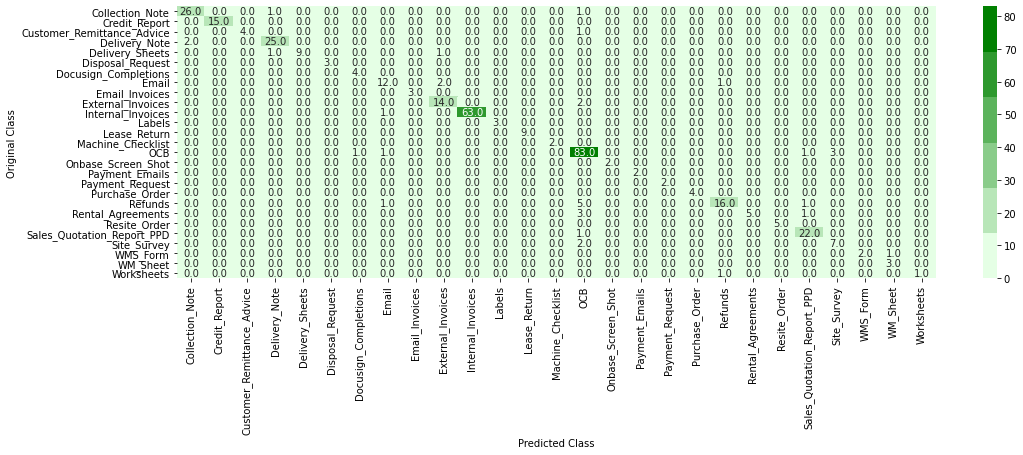

-------------------------------------------------- Precision matrix --------------------------------------------------


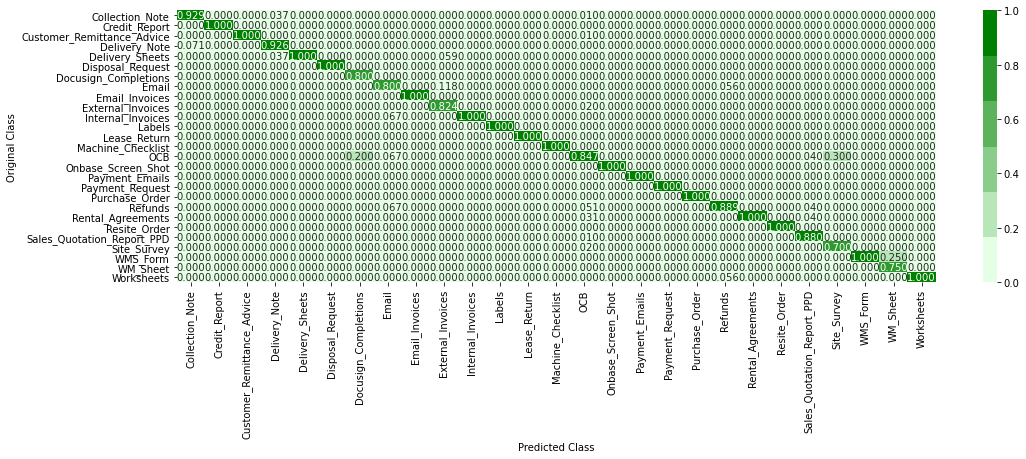

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


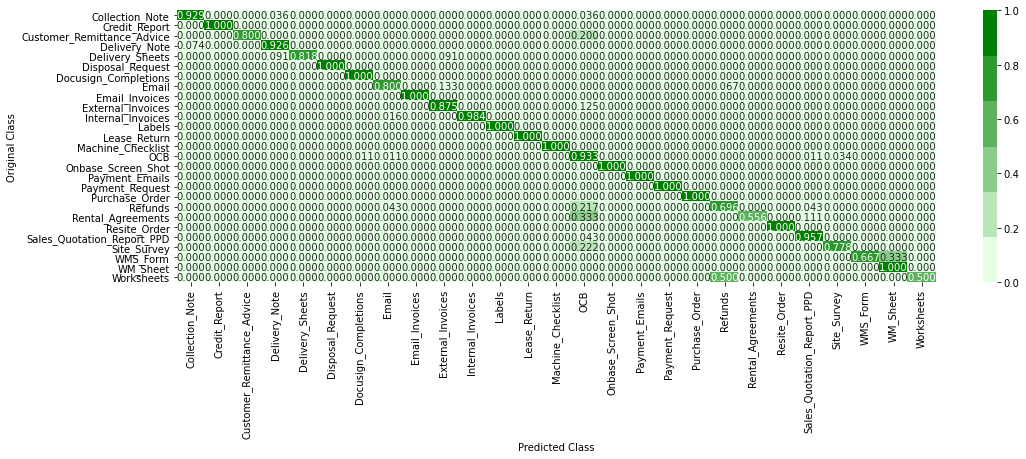

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


In [60]:
weights=[0.4,0.2,0.2,0.1,0.1]
y_true,y_pred=eval_stacked_model(weights)